In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
voice_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Деревья_решений Задача классификации/voice_gender.zip')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Посмотрим на типизацию признаков:

In [ ]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Итак, все признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке sklearn, поэтому кодирование категориальных признаков нам не потребуется.

In [ ]:
#Проверим данные на наличие пропусков:
voice_data.isnull().sum().sum()

0

Общее количество пропусков в датасете равно 0. Значит, обработка пропущенных значений нам не потребуется.

Перейдём к формированию обучающей и тестовой выборок. Разделим датасет на две части в соотношении 80/20:

In [ ]:
# Формируем обучающую и тестовую выборки
X = voice_data.drop(columns = ['label'])
y = voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


Дополнительная предобработка данных нам не потребуется, поэтому мы можем смело перейти к построению моделей. Для моделирования мы, конечно же, будем использовать модели «древесного» типа.

Начнём с решающего пня.

Создадим модель дерева решений максимальной глубины 1. В качестве критерия информативности используем энтропию Шеннона.

Обучим модель на тренировочной выборке и визуализируем её в виде графа.
1. На основе какого фактора будет построено решающее правило в корневой вершине?


In [ ]:
# Создаем модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=1,
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

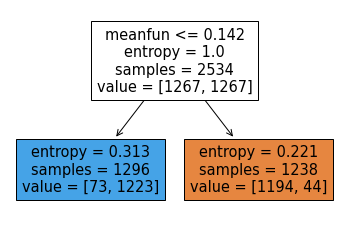

In [ ]:
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.

In [ ]:
print(round(1296/2534*100,1))

51.1


 Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
#Выводим значения метрики
y_test_pred = dt.predict(X_test)
print('Test: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Test: 0.956


Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

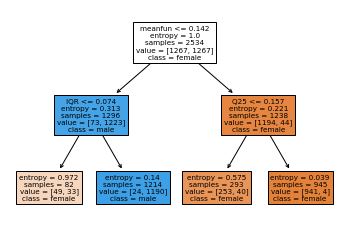

In [ ]:
# Создаем модель дерева решений
dt2 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=2,
    random_state=0 #генератор случайных чисел
)

dt2.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt2, #дерево решений
    feature_names=X_train.columns,
    class_names=dt2.classes_, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);


 Сколько листьев в построенном дереве содержат в качестве предсказания класс female? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции plot_tree(), укажите параметр class_names=dt.classes_.

 Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
#Выводим значения метрики
y_test_pred = dt2.predict(X_test)
print('Test: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Test: 0.962


Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

In [ ]:
# Создаем модель дерева решений
dt3 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода get_depth().

In [ ]:
dt3.get_depth()

12

Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода get_n_leaves().

In [ ]:
dt3.get_n_leaves()


54

Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [ ]:
#Выводим значения метрики
y_train_pred = dt3.predict(X_train)
print('Train: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = dt3.predict(X_test)
print('Test: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train: 1.000
Test: 0.973


Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

In [ ]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [ ]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

In [ ]:
grid_search = GridSearchCV(
    #алгоритм, который будем оптимизировать
    estimator=tree.DecisionTreeClassifier(
        random_state=0 #генератор случайных чисел
    ),
    param_grid=param_grid,
    #количество фолдов в кросс-валидации
    cv=model_selection.StratifiedKFold(n_splits=5)
)
%time grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
print('Train: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('Test: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 9.69 s, sys: 0 ns, total: 9.69 s
Wall time: 9.75 s
Train: 0.996
Test: 0.970
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


In [ ]:
# Создаем модель дерева решений
dt_best = tree.DecisionTreeClassifier(
   criterion = 'gini', #критерий информативности
   max_depth = 7,
   min_samples_split = 3,
   random_state=0 #генератор случайных чисел
)

dt_best.fit(X_train, y_train)
importances = dt_best.feature_importances_

importances1 = pd.DataFrame(importances, index = X_train.columns, columns = ["meaning"]).sort_values(by= "meaning", ascending=False)
print(importances1)

           meaning
meanfun   0.861347
IQR       0.056810
sfm       0.018004
minfun    0.014153
dfrange   0.006888
kurt      0.006544
mode      0.006047
centroid  0.005985
skew      0.004196
sd        0.004120
Q75       0.003614
median    0.003247
meanfreq  0.002571
mindom    0.001534
Q25       0.001432
modindx   0.001388
meandom   0.001200
sp.ent    0.000919
maxfun    0.000000
maxdom    0.000000


Text(0, 0.5, 'feature')

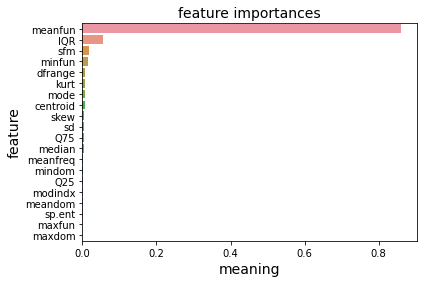

In [ ]:
ax = sns.barplot(y=importances1.index, x=importances1.iloc[:,0], data = importances1, ci= None);
ax.set_title("feature importances", fontsize=14)
ax.set_xlabel("meaning", fontsize=14)
ax.set_ylabel("feature", fontsize=14)

#Практика эталон

 Задание 7.1

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины  
1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.
1. На основе какого фактора будет построено решающее правило в корневой вершине?
meanfreq (средняя частота)
median (медианная частота)
IQR (межквартильный размах частот)
meanfun (средняя основная частота в акустическом спектре)
minfun (минимальная основная частота в акустическом спектре)
Q25 (первый квартиль частоты)
верно
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.
верно
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
верно
4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
#Задание 7.1

# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy' #критерий информативности
)
dt.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, #дерево
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    class_names=dt.classes_, #имена классов
);
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))



Задание 7.2

Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной  
 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.
1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:
A meanfreq (средняя частота)
B median (медианная частота)
C IQR (межквартильный размах частот)
D meanfun (средняя основная частота в акустическом спектре)
E minfun (минимальная основная частота в акустическом спектре)
F Q25 (первый квартиль частоты)
верно
Ответ
Верно:
C Верно.
D Верно.
F Верно.
2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции plot_tree(), укажите параметр class_names=dt.classes_.
3. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
#Задание 7.2

# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=42
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, #дерево
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    class_names=dt.classes_, #имена классов
);
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Задание 7.3

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.
1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода get_depth().
2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода get_n_leaves().
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.
accuracy на обучающей выборке:
accuracy на тестовой выборке:

In [ ]:
#Задание 7.3

# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
print('Depth: {}'.format(dt.get_depth()))
print('Count of leaves: {}'.format(dt.get_n_leaves()))
# Делаем предсказание
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))



Задание 7.4

Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:

### Задаём сетку параметров
param_grid = {

    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):

### Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.
1. Какой критерий информативности использует наилучшая модель?
Критерий Джини
Энтропия Шеннона
2. Чему равна оптимальная максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.
accuracy на обучающей выборке:
accuracy на тестовой выборке:

In [ ]:
#Задание 7.4

# Задаем сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаем метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Инициализируем поиск на сетке и обучаем его
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs.fit(X_train, y_train)
print(gs.best_params_)
# Определяем наилучшую модель
best_tree = gs.best_estimator_

# Делаем предсказание
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Задание 7.5

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов.   

Визуализируйте её в виде столбчатой диаграммы.

Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:
A meanfreq (средняя частота)
B median (медианная частота)
C IQR (межквартильный размах частот)
D meanfun (средняя основная частота в акустическом спектре)
E minfun (минимальная основная частота в акустическом спектре)
F Q25 (первый квартиль частоты)
F sfm (спектральная равномерность)
верно
Ответ
Верно:
C Верно.
D Верно.
F Верно.


In [ ]:
#Задание 7.5

fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)